<a href="https://colab.research.google.com/github/kausalyasundar/HealthcareSystem_Python/blob/master/PROJECT_PHASE_I_IMPLEMENTATION(1951002).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# We'll start by creating a directory in which we'll define our new
# module to be imported.
!mkdir -p local_modules/demo_module

In [2]:
%%writefile local_modules/demo_module/__init__.py
# Save a module init file that contains a custom function that we'll use
# to verify that import works.

def SomeFunction():
  return 'Function from a local module'

Writing local_modules/demo_module/__init__.py


In [3]:
# Add the local_modules directory to the set of paths
# Python uses to look for imports.
import sys
sys.path.append('local_modules')

In [4]:
from google.colab import files
uploaded = files.upload()

Saving ADMISSIONS.csv to ADMISSIONS.csv
Saving CALLOUT.csv to CALLOUT.csv
Saving CAREGIVERS.csv to CAREGIVERS.csv
Saving CHARTEVENTS.csv to CHARTEVENTS.csv
Saving CPTEVENTS.csv to CPTEVENTS.csv
Saving D_CPT.csv to D_CPT.csv
Saving D_ICD_DIAGNOSES.csv to D_ICD_DIAGNOSES.csv
Saving D_ICD_PROCEDURES.csv to D_ICD_PROCEDURES.csv
Saving D_ITEMS.csv to D_ITEMS.csv
Saving D_LABITEMS.csv to D_LABITEMS.csv
Saving DATETIMEEVENTS.csv to DATETIMEEVENTS.csv
Saving DIAGNOSES_ICD.csv to DIAGNOSES_ICD.csv
Saving DRGCODES.csv to DRGCODES.csv
Saving ICUSTAYS.csv to ICUSTAYS.csv
Saving INPUTEVENTS_CV.csv to INPUTEVENTS_CV.csv
Saving INPUTEVENTS_MV.csv to INPUTEVENTS_MV.csv
Saving LABEVENTS.csv to LABEVENTS.csv
Saving LICENSE.txt to LICENSE.txt
Saving MICROBIOLOGYEVENTS.csv to MICROBIOLOGYEVENTS.csv
Saving NOTEEVENTS.csv to NOTEEVENTS.csv
Saving OUTPUTEVENTS.csv to OUTPUTEVENTS.csv
Saving PATIENTS.csv to PATIENTS.csv
Saving PRESCRIPTIONS.csv to PRESCRIPTIONS.csv
Saving PROCEDUREEVENTS_MV.csv to PROCEDUREEV

In [7]:
import seaborn as sns
import pickle
from sklearn.metrics import roc_curve, accuracy_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import kurtosis

In [8]:
import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics
import tensorflow as tf





In [ ]:
!apt install octave

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  aglfn epstool fonts-droid-fallback fonts-noto-mono ghostscript gnuplot-data
  gnuplot-qt gsfonts imagemagick-6-common info install-info libamd2
  libauthen-sasl-perl libcamd2 libccolamd2 libcholmod3 libcolamd2
  libcupsfilters1 libcupsimage2 libcxsparse3 libdata-dump-perl libemf1
  libencode-locale-perl libfftw3-single3 libfile-listing-perl libfltk-gl1.3
  libfltk1.3 libfont-afm-perl libgail-common libgail18 libglpk40
  libgraphicsmagick++-q16-12 libgraphicsmagick-q16-3 libgs9 libgs9-common
  libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libhtml-form-perl
  libhtml-format-perl libhtml-parser-perl libhtml-tagset-perl
  libhtml-tree-perl libhttp-cookies-perl libhttp-daemon-perl libhttp-date-perl
  libhttp-message-perl libhttp-negotiate-perl libijs-0.35 libio-html-perl
  libio-socket-ssl-perl libjbig2dec0 liblqr-1-0 liblua5.3-0
  liblwp-mediat

In [ ]:
!pip install sklearn


In [9]:
!pip install seaborn

In [10]:
!pip install keras


In [12]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

Requirement already up-to-date: libarchive in /usr/local/lib/python3.6/dist-packages (0.4.7)


In [13]:
df=pd.read_csv('ADMISSIONS.csv')
df.describe()

,row_id,subject_id,hadm_id,hospital_expire_flag,has_chartevents_data
count,129.000000,129.000000,129.000000,129.000000,129.000000
mean,28036.441860,28010.410853,152343.441860,0.310078,0.992248
std,14036.548988,16048.502883,27858.788248,0.464328,0.088045
min,12258.000000,10006.000000,100375.000000,0.000000,0.000000
25%,12339.000000,10088.000000,128293.000000,0.000000,1.000000
50%,39869.000000,40310.000000,157235.000000,0.000000,1.000000
75%,40463.000000,42135.000000,174739.000000,1.000000,1.000000
max,41092.000000,44228.000000,199395.000000,1.000000,1.000000


In [14]:
df=pd.read_csv('PATIENTS.csv')
df.describe()

,row_id,subject_id,expire_flag
count,100.000000,100.000000,100.0
mean,20452.580000,26162.330000,1.0
std,10982.043163,16201.834705,0.0
min,9467.000000,10006.000000,1.0
25%,9526.500000,10068.500000,1.0
50%,20209.000000,25128.000000,1.0
75%,31391.250000,42276.500000,1.0
max,31872.000000,44228.000000,1.0


In [15]:
df= pd.read_csv('PATIENTS.csv')
df.head(14)

,row_id,subject_id,gender,dob,dod,dod_hosp,dod_ssn,expire_flag
0,9467,10006,F,05-03-94 0:00,12-08-65 0:00,12-08-65 0:00,12-08-65 0:00,1
1,9472,10011,F,05-06-90 0:00,28-08-26 0:00,28-08-26 0:00,NaN,1
2,9474,10013,F,03-09-38 0:00,07-10-25 0:00,07-10-25 0:00,07-10-25 0:00,1
3,9478,10017,F,21-09-75 0:00,12-09-52 0:00,NaN,12-09-52 0:00,1
4,9479,10019,M,20-06-14 0:00,15-05-63 0:00,15-05-63 0:00,15-05-63 0:00,1
5,9486,10026,F,1895-05-17 00:00:00,24-11-95 0:00,NaN,24-11-95 0:00,1
6,9487,10027,F,15-01-08 0:00,14-09-90 0:00,NaN,14-09-90 0:00,1
7,9489,10029,M,10-04-61 0:00,21-09-40 0:00,NaN,21-09-40 0:00,1
8,9491,10032,M,29-03-50 0:00,21-05-38 0:00,21-05-38 0:00,21-05-38 0:00,1
9,9492,10033,F,21-04-51 0:00,09-09-33 0:00,NaN,09-09-33 0:00,1


In [16]:
df=pd.read_csv('ICUSTAYS.csv')
df.describe()

,row_id,subject_id,hadm_id,icustay_id,first_wardid,last_wardid,los
count,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000
mean,29370.316176,28263.485294,153259.566176,250980.470588,34.470588,34.022059,4.452457
std,14550.435239,16008.281510,28054.220280,28455.125832,18.876182,19.280951,6.196828
min,12742.000000,10006.000000,100375.000000,201006.000000,7.000000,7.000000,0.105900
25%,12826.750000,10089.750000,129028.000000,224359.250000,14.750000,14.000000,1.233525
50%,41427.000000,40307.000000,157724.000000,250055.000000,33.000000,33.000000,2.111450
75%,42073.750000,42207.000000,174896.500000,277279.250000,52.000000,52.000000,4.329050
max,42714.000000,44228.000000,199395.000000,298685.000000,57.000000,57.000000,35.406500


In [17]:
df=pd.read_csv('LABEVENTS.csv')
df.tail(13)

,row_id,subject_id,hadm_id,itemid,charttime,value,valuenum,valueuom,flag
76061,20452671,44228,103379.0,51265,23-12-70 4:36,536,536.00,K/uL,abnormal
76062,20452672,44228,103379.0,51277,23-12-70 4:36,14.4,14.40,%,NaN
76063,20452673,44228,103379.0,51279,23-12-70 4:36,2.93,2.93,m/uL,abnormal
76064,20452674,44228,103379.0,51301,23-12-70 4:36,16.8,16.80,K/uL,abnormal
76065,20452675,44228,103379.0,51221,24-12-70 4:09,24.2,24.20,%,abnormal
76066,20452676,44228,103379.0,51222,24-12-70 4:09,8.3,8.30,g/dL,abnormal
76067,20452677,44228,103379.0,51248,24-12-70 4:09,30.2,30.20,pg,NaN
76068,20452678,44228,103379.0,51249,24-12-70 4:09,34.4,34.40,%,NaN
76069,20452679,44228,103379.0,51250,24-12-70 4:09,88,88.00,fL,NaN
76070,20452680,44228,103379.0,51265,24-12-70 4:09,595,595.00,K/uL,abnormal


In [18]:
df=pd.read_csv('D_ICD_DIAGNOSES.csv')
df.describe()

,row_id
count,14567.000000
mean,7284.000000
std,4205.275021
min,1.000000
25%,3642.500000
50%,7284.000000
75%,10925.500000
max,14567.000000


In [19]:
df=pd.read_csv('CHARTEVENTS.csv')
df.describe()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,10,13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,row_id,subject_id,hadm_id,icustay_id,itemid,cgid,valuenum,warning,error
count,7.583550e+05,758355.000000,758355.000000,758274.000000,758355.000000,758355.000000,3.238840e+05,382279.000000,382279.000000
mean,1.632063e+08,26308.006320,153851.705002,249203.993498,113923.014463,17960.991000,8.157890e+01,0.019321,0.001695
std,1.010304e+08,16110.663258,25872.834680,25510.277662,111088.482196,2178.703268,3.911579e+03,0.137651,0.041137
min,5.279021e+06,10006.000000,100375.000000,201006.000000,1.000000,14023.000000,-5.000000e+02,0.000000,0.000000
25%,8.601915e+07,10111.000000,138132.000000,232110.000000,618.000000,15963.000000,4.000000e+00,0.000000,0.000000
50%,2.035645e+08,40124.000000,160445.000000,249805.000000,220045.000000,17873.000000,3.500000e+01,0.000000,0.000000
75%,2.725167e+08,42135.000000,172082.000000,271544.000000,224080.000000,19907.000000,9.200000e+01,0.000000,0.000000
max,2.744939e+08,44228.000000,199395.000000,298685.000000,228414.000000,21570.000000,2.222222e+06,1.000000,1.000000


In [20]:
df=pd.read_csv('CAREGIVERS.csv')
df.describe()
df.head()

,row_id,cgid,label,description
0,2228,16174,RO,Read Only
1,2229,16175,RO,Read Only
2,2230,16176,Res,Resident/Fellow/PA/NP
3,2231,16177,RO,Read Only
4,2232,16178,RT,Respiratory


In [21]:
df=pd.read_csv('CALLOUT.csv')
df.head()


,row_id,subject_id,hadm_id,submit_wardid,submit_careunit,curr_wardid,curr_careunit,callout_wardid,callout_service,request_tele,request_resp,request_cdiff,request_mrsa,request_vre,callout_status,callout_outcome,discharge_wardid,acknowledge_status,createtime,updatetime,acknowledgetime,outcometime,firstreservationtime,currentreservationtime
0,3917,10017,199207,7,NaN,45,CCU,1,MED,1,0,0,0,0,Inactive,Discharged,45.0,Acknowledged,31-05-49 10:44,31-05-49 10:44,31-05-49 15:08,31-05-49 22:40,NaN,NaN
1,3919,10026,103770,33,NaN,3,SICU,3,NMED,1,0,0,0,0,Inactive,Discharged,3.0,Revised,18-05-95 13:56,19-05-95 15:45,NaN,19-05-95 17:40,NaN,NaN
2,3920,10027,199395,12,NaN,55,CSRU,55,CSURG,1,0,0,0,0,Inactive,Discharged,55.0,Acknowledged,20-07-90 8:15,20-07-90 8:15,20-07-90 8:57,20-07-90 17:10,NaN,NaN
3,3921,10029,132349,33,NaN,45,SICU,1,MED,0,0,0,1,1,Inactive,Discharged,45.0,Acknowledged,24-09-39 9:53,24-09-39 9:53,24-09-39 9:56,25-09-39 19:10,NaN,NaN
4,3922,10033,157235,33,NaN,4,SICU,1,MED,1,0,0,0,0,Inactive,Discharged,4.0,Revised,06-12-32 10:16,06-12-32 14:53,NaN,06-12-32 15:10,NaN,NaN


In [22]:
df=pd.read_csv('PRESCRIPTIONS.csv')
df.head(20)

,row_id,subject_id,hadm_id,icustay_id,startdate,enddate,drug_type,drug,drug_name_poe,drug_name_generic,formulary_drug_cd,gsn,ndc,prod_strength,dose_val_rx,dose_unit_rx,form_val_disp,form_unit_disp,route
0,32600,42458,159647,NaN,2146-07-21 00:00:00,2146-07-22 00:00:00,MAIN,Pneumococcal Vac Polyvalent,Pneumococcal Vac Polyvalent,PNEUMOcoccal Vac Polyvalent,PNEU25I,48548.0,6.494300e+06,25mcg/0.5mL Vial,0.5,mL,1,VIAL,IM
1,32601,42458,159647,NaN,2146-07-21 00:00:00,2146-07-22 00:00:00,MAIN,Bisacodyl,Bisacodyl,Bisacodyl,BISA5,2947.0,5.363381e+08,5 mg Tab,10,mg,2,TAB,PO
2,32602,42458,159647,NaN,2146-07-21 00:00:00,2146-07-22 00:00:00,MAIN,Bisacodyl,Bisacodyl,Bisacodyl (Rectal),BISA10R,2944.0,5.747050e+08,10mg Suppository,10,mg,1,SUPP,PR
3,32603,42458,159647,NaN,2146-07-21 00:00:00,2146-07-22 00:00:00,MAIN,Senna,Senna,Senna,SENN187,19964.0,9.045166e+08,1 Tablet,1,TAB,1,TAB,PO
4,32604,42458,159647,NaN,2146-07-21 00:00:00,2146-07-21 00:00:00,MAIN,Docusate Sodium (Liquid),Docusate Sodium (Liquid),Docusate Sodium (Liquid),DOCU100L,3017.0,1.210544e+08,100mg UD Cup,100,mg,1,UDCUP,PO
5,32605,42458,159647,NaN,2146-07-21 00:00:00,2146-07-22 00:00:00,MAIN,Heparin,Heparin,Heparin Sodium,HEPA5I,6549.0,6.332303e+10,5000 Units / mL- 1mL Vial,5000,UNIT,1,mL,SC
6,32606,42458,159647,NaN,2146-07-21 00:00:00,2146-07-22 00:00:00,MAIN,Simvastatin,Simvastatin,Simvastatin,SIMV10,16577.0,5.107905e+10,10mg Tablet,20,mg,2,TAB,PO
7,32607,42458,159647,NaN,2146-07-21 00:00:00,2146-07-22 00:00:00,MAIN,Aspirin,Aspirin,Aspirin,ASA81,4380.0,9.044041e+08,81mg Tab,162,mg,2,TAB,PO
8,32608,42458,159647,NaN,2146-07-21 00:00:00,2146-07-22 00:00:00,MAIN,Donepezil,Donepezil,Donepezil,DONE5,29335.0,6.285602e+10,5mg Tablet,10,mg,2,TAB,PO
9,32609,42458,159647,NaN,2146-07-21 00:00:00,2146-07-22 00:00:00,MAIN,Gabapentin,Gabapentin,Gabapentin,GABA100,21413.0,9.045632e+08,100mg Capsule,100,mg,1,CAP,PO


In [ ]:
# To determine which version you're using:
!pip show tensorflow

# For the current version: 
!pip install --upgrade tensorflow

# For a specific version:
!pip install tensorflow==1.2

# For the latest nightly build:
!pip install tf-nightly

Name: tensorflow
Version: 2.3.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: keras-preprocessing, scipy, tensorflow-estimator, absl-py, h5py, termcolor, wrapt, opt-einsum, six, grpcio, tensorboard, numpy, gast, protobuf, google-pasta, wheel, astunparse
Required-by: fancyimpute
     |████████████████████████████████| 320.4MB 43kB/s 
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0


     |████████████████████████████████| 35.0MB 130kB/s 
     |████████████████████████████████| 245kB 45.2MB/s 
     |████████████████████████████████| 890kB 39.0MB/s 
  Created wheel for markdown: filename=Markdown-2.2.0-cp36-none-any.whl size=136285 sha256=8ae0e0e5b180051d752237c704574bd041f93176424fd99a50500fbb0d39ab40
  Stored in directory: /root/.cache/pip/wheels/b6/52/17/f0af18e3e0ec6fa60b361ffed15b4c3468f6f3bcdb87fbe079
  Created wheel for html5lib: filename=html5lib-0.9999999-cp36-none-any.whl size=107220 sha256=f0faa09f41bc97caae3d969475f8bb1720a5ca86e90cf4332253e1c5a17e1524
  Stored in directory: /root/.cache/pip/wheels/50/ae/f9/d2b189788efcf61d1ee0e36045476735c838898eef1cad6e29
Successfully built markdown html5lib
ERROR: tensorboard 2.3.0 has requirement markdown>=2.6.8, but you'll have markdown 2.2.0 which is incompatible.
  Found existing installation: Markdown 3.3.3
    Uninstalling Markdown-3.3.3:
      Successfully uninstalled Markdown-3.3.3
  Found existing installatio

     |████████████████████████████████| 394.9MB 35kB/s 
     |████████████████████████████████| 10.6MB 39.2MB/s 
     |████████████████████████████████| 3.8MB 43.0MB/s 
     |████████████████████████████████| 471kB 42.8MB/s 
     |████████████████████████████████| 14.5MB 214kB/s 
     |████████████████████████████████| 1.3MB 33.2MB/s 
     |████████████████████████████████| 102kB 10.7MB/s 
ERROR: tensorflow 1.2.0 has requirement markdown==2.2.0, but you'll have markdown 3.3.3 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: protobuf 3.12.4
    Uninstalling protobuf-3.12.4:
      Successfully uninstalled protobuf-3.12.4
  Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5
  Found existing inst

In [23]:
df=pd.read_csv('MICROBIOLOGYEVENTS.csv')
df.tail(10)

,row_id,subject_id,hadm_id,chartdate,charttime,spec_itemid,spec_type_desc,org_itemid,org_name,isolate_num,ab_itemid,ab_name,dilution_text,dilution_comparison,dilution_value,interpretation
1993,439855,44228,103379,15-12-70 0:00,NaN,70012,BLOOD CULTURE,80002.0,ESCHERICHIA COLI,1.0,90018.0,CEFTRIAXONE,<=1,<=,1.0,S
1994,439856,44228,103379,15-12-70 0:00,NaN,70012,BLOOD CULTURE,80002.0,ESCHERICHIA COLI,1.0,90019.0,CIPROFLOXACIN,=>4,=>,4.0,R
1995,439857,44228,103379,16-12-70 0:00,16-12-70 10:54,70064,STOOL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,439858,44228,103379,17-12-70 0:00,17-12-70 6:23,70012,BLOOD CULTURE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997,439859,44228,103379,17-12-70 0:00,17-12-70 12:33,70079,URINE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998,439860,44228,103379,17-12-70 0:00,17-12-70 12:33,70012,BLOOD CULTURE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999,439861,44228,103379,17-12-70 0:00,17-12-70 15:42,70064,STOOL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000,439862,44228,103379,17-12-70 0:00,17-12-70 18:23,70091,MRSA SCREEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001,439863,44228,103379,18-12-70 0:00,18-12-70 16:49,70064,STOOL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002,439864,44228,103379,24-12-70 0:00,24-12-70 14:44,70064,STOOL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df=pd.read_csv('SERVICES.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   row_id        163 non-null    int64 
 1   subject_id    163 non-null    int64 
 2   hadm_id       163 non-null    int64 
 3   transfertime  163 non-null    object
 4   prev_service  34 non-null     object
 5   curr_service  163 non-null    object
dtypes: int64(3), object(3)
memory usage: 7.8+ KB


In [25]:
df=pd.read_csv('CPTEVENTS.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1579 entries, 0 to 1578
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_id            1579 non-null   int64  
 1   subject_id        1579 non-null   int64  
 2   hadm_id           1579 non-null   int64  
 3   costcenter        1579 non-null   object 
 4   chartdate         291 non-null    object 
 5   cpt_cd            1579 non-null   int64  
 6   cpt_number        1579 non-null   int64  
 7   cpt_suffix        0 non-null      float64
 8   ticket_id_seq     1288 non-null   float64
 9   sectionheader     1579 non-null   object 
 10  subsectionheader  1579 non-null   object 
 11  description       291 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 148.2+ KB


In [26]:
df=pd.read_csv('D_ITEMS.csv')
df.isnull().sum()

row_id              0
itemid              0
label               4
abbreviation     9495
dbsource            0
linksto             0
category         6438
unitname        11253
param_type       9495
conceptid       12487
dtype: int64

In [27]:
df=pd.read_csv('DATETIMEEVENTS.csv')
df.isnull().sum()

row_id              0
subject_id          0
hadm_id             0
icustay_id         12
itemid              0
charttime           0
storetime           0
cgid                0
value              84
valueuom            0
warning          4637
error            4637
resultstatus    15551
stopped         10914
dtype: int64

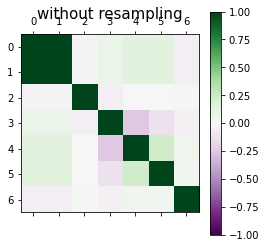

In [28]:
import matplotlib.pyplot as plt
df= pd.read_csv('TRANSFERS.csv')
plt.matshow(df.corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('without resampling', size=15)
plt.colorbar()
plt.show()